In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import seaborn as sns

# Question 2

2.Salary_hike -> Build a prediction model for Salary_hike
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [8]:
hike1 = pd.read_csv('C:\\Users\\HP\\Downloads\\Salary_Data.csv')
hike1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
hike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [12]:
hike1.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

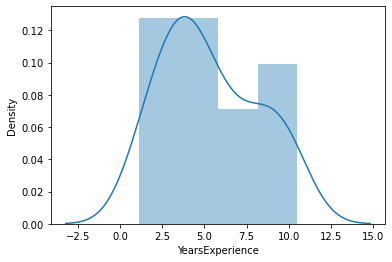

In [14]:
sns.distplot(hike1['YearsExperience'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

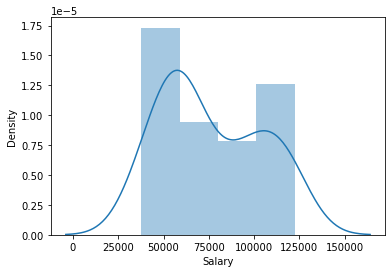

In [16]:
sns.distplot(hike1['Salary'])

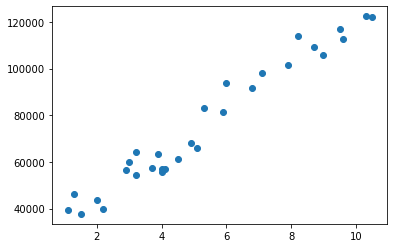

In [18]:
plt.scatter('YearsExperience','Salary',data=hike1)
plt.show()

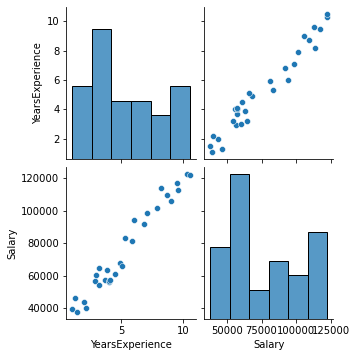

In [20]:
sns.pairplot(hike1)

# Correlation

In [22]:
hike1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

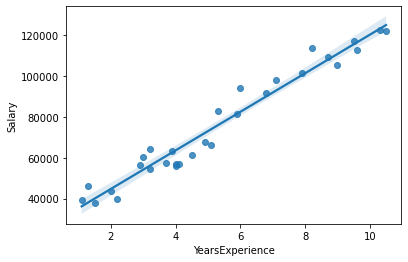

In [24]:
sns.regplot('YearsExperience','Salary',data=hike1)

# Making model

In [26]:
model = smf.ols("Salary~YearsExperience",data = hike1).fit()
model

In [28]:
# summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        16:45:21   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Coefficients

model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [32]:
# t and p-Values

print(model.tvalues, '\n', model.pvalues) 

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [34]:
# R squared values

(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [36]:
# sqrt vaqlues
np.sqrt(model.rsquared)

0.9782416184887599

# Using log make a model

In [38]:
model2=smf.ols("Salary~np.log(YearsExperience)",data=hike1).fit()
model2

In [40]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           3.25e-13
Time:                        16:47:23   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
print(model2.params,'\n''\n',model2.tvalues,'\n''\n', model2.pvalues)

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64 

 Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64 

 Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64


In [44]:
model2.rsquared,model2.rsquared_adj

(0.853888882875697, 0.8486706286926862)

# R-square Values

In [46]:
model3 = smf.ols("Salary~np.square(YearsExperience)",data = hike1).fit() 

In [48]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           1.52e-16
Time:                        16:49:20   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(YearsExperience)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
print(model3.params,'\n''\n',model3.tvalues,'\n''\n', model3.pvalues)

Intercept                     48042.585515
np.square(YearsExperience)      776.318773
dtype: float64 

 Intercept                     21.973654
np.square(YearsExperience)    17.397015
dtype: float64 

 Intercept                     3.389190e-19
np.square(YearsExperience)    1.518127e-16
dtype: float64


In [52]:
model3.rsquared,model3.rsquared_adj

(0.9153198857852565, 0.9122955959918728)

# Using square root

In [54]:
model4 = smf.ols("Salary~np.sqrt(YearsExperience)",data = hike1).fit()

In [56]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           8.57e-18
Time:                        16:50:27   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
print(model4.params,'\n''\n',model4.tvalues,'\n''\n', model4.pvalues)  

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64 

 Intercept                   -3.262308
np.sqrt(YearsExperience)    19.437148
dtype: float64 

 Intercept                   2.906965e-03
np.sqrt(YearsExperience)    8.565358e-18
dtype: float64


In [60]:
model4.rsquared,model4.rsquared_adj

(0.9310009544993526, 0.9285367028743294)

# Model Prediction with new data frame

In [62]:
new_data=pd.Series([5,10])
new_data

0     5
1    10
dtype: int64

In [64]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,5
1,10


In [66]:
model.predict(data_pred)

0     73042.011806
1    120291.823413
dtype: float64

In [68]:
model2.predict(data_pred)

0     80242.161754
1    108371.452290
dtype: float64

In [70]:
model3.predict(data_pred)

0     67450.554847
1    125674.462846
dtype: float64

In [72]:
model4.predict(data_pred)

0     76742.573779
1    115180.905973
dtype: float64

In [74]:
pred=model.predict(hike1)
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [76]:
pred1=model2.predict(hike1)
pred1

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [78]:
pred2=model3.predict(hike1)
pred2

0      48981.931230
1      49354.564241
2      49789.302755
3      51147.860608
4      51799.968377
5      54571.426398
6      55029.454474
7      55992.089753
8      55992.089753
9      58670.389521
10     59850.394057
11     60463.685888
12     60463.685888
13     61092.504094
14     63763.040674
15     66681.999262
16     68234.636808
17     69849.379857
18     75066.242014
19     75990.061354
20     83939.565592
21     87176.814877
22     96492.640157
23    100242.259832
24    106802.153466
25    110924.406153
26    118105.354806
27    119588.123663
28    130402.244175
29    133631.730272
dtype: float64

In [80]:
pred3=model4.predict(hike1)
pred3

0      27470.511884
1      31262.287009
2      34771.976586
3      42635.056211
4      45499.687794
5      54617.343293
6      55825.518202
7      58182.905200
8      58182.905200
9      63772.383867
10     65901.508208
11     66945.592049
12     66945.592049
13     67976.704394
14     71980.468875
15     75809.903446
16     77665.963118
17     79485.972499
18     84749.033766
19     85599.722290
20     92164.765553
21     94526.218887
22    100589.939171
23    102784.094601
24    106353.652306
25    108446.272632
26    111857.919142
27    112529.386687
28    117134.909368
29    118421.805716
dtype: float64

In [84]:
salary = pd.read_csv('C:\\Users\\HP\\Downloads\\Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [86]:
dataa=pd.concat([hike1,pred,pred1,pred2,pred3],axis=1)
dataa.head()

,YearsExperience,Salary,0,1,2,3
0,1.1,39343.0,36187.158752,18795.848339,48981.931230,27470.511884
1,1.3,46205.0,38077.151217,25575.235192,49354.564241,31262.287009
2,1.5,37731.0,39967.143681,31382.551905,49789.302755,34771.976586
3,2.0,43525.0,44692.124842,43057.262306,51147.860608,42635.056211
4,2.2,39891.0,46582.117306,46925.138875,51799.968377,45499.687794


In [88]:
hike1=dataa.rename({0:'pred',1:'pred1',2:'pred2',3:'pred3'},axis=1)
hike1.head()

,YearsExperience,Salary,pred,pred1,pred2,pred3
0,1.1,39343.0,36187.158752,18795.848339,48981.931230,27470.511884
1,1.3,46205.0,38077.151217,25575.235192,49354.564241,31262.287009
2,1.5,37731.0,39967.143681,31382.551905,49789.302755,34771.976586
3,2.0,43525.0,44692.124842,43057.262306,51147.860608,42635.056211
4,2.2,39891.0,46582.117306,46925.138875,51799.968377,45499.687794


pred = prediction of model with our original data

pred1 = prediction of log model with our original data

pred2 = prediction of sqaure model with our original data

pred3 = prediction of sqaure root model with our original data